In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [6]:
from scipy.stats import zscore

In [10]:
salary = pd.read_csv('Salary.csv')

In [11]:
salary.head(20)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [12]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
salary.skew()

YearsExperience    0.420163
Salary             0.209005
dtype: float64

In [24]:
z_score=abs(zscore(salary))
print(salary.shape)

(35, 2)


In [26]:
salary_final= salary.loc[(z_score<3).all(axis=1)]
print(salary_final.shape)

(35, 2)


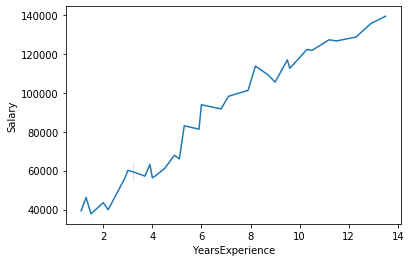

In [30]:
sns.lineplot(x=salary['YearsExperience'], y=salary['Salary'],data = salary)
plt.show()

In [31]:
x= salary['YearsExperience']
y=salary['Salary']

In [33]:
from sklearn.preprocessing import StandardScaler


In [40]:
sc = StandardScaler()
x=pd.get_dummies(x)

In [41]:

x_std = sc.fit_transform(x)
x_std

array([[ 5.83095189, -0.17149859, -0.17149859, ..., -0.17149859,
        -0.17149859, -0.17149859],
       [-0.17149859,  5.83095189, -0.17149859, ..., -0.17149859,
        -0.17149859, -0.17149859],
       [-0.17149859, -0.17149859,  5.83095189, ..., -0.17149859,
        -0.17149859, -0.17149859],
       ...,
       [-0.17149859, -0.17149859, -0.17149859, ...,  5.83095189,
        -0.17149859, -0.17149859],
       [-0.17149859, -0.17149859, -0.17149859, ..., -0.17149859,
         5.83095189, -0.17149859],
       [-0.17149859, -0.17149859, -0.17149859, ..., -0.17149859,
        -0.17149859,  5.83095189]])

In [42]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split



In [55]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,random_state = 100, test_size=0.20)

In [56]:
max_r_score=0
for r_state in range(42,100):
    x_train, x_test,y_train,y_test = train_test_split(x_std,y,random_state = r_state, test_size=0.20)

In [59]:
regr= linear_model.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred = regr.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
r2_scr
    

-4.1901529300920273e+24

In [71]:
if r2_scr > max_r_score:
    max_r_score = r2_scr
   
    

In [73]:
final_r_state = r_state
final_r_state
print("max r2 score corresponding to", final_r_state ,'is',max_r_score )

max r2 score corresponding to 99 is 0


In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2').mean()

-5.0211454537862295e+26

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state= 99, test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [77]:
print('r2_score is:' , r2_score(y_test,y_pred))
print("RMSE is:" , np.sqrt(mean_squared_error(y_test,y_pred)))


r2_score is: -2.1590242091059177e+24
RMSE is: 3.0935554551392188e+16


In [79]:
from sklearn.externals import joblib
joblib.dump(lreg, 'Salary_set.pkl')

['Salary_set.pkl']